In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import tdpkefm
from tdpkefm import *
import json_tricks

# Plot Figure S2

In [3]:
# Use the file generated from S2-data.py to reproduce analysis
# This uses the saved data included with the repository.
combined_data = json_tricks.load("results/S2-data.json.gz")

# Choose data sets with different \tau_L 
varying_taus = {i: combined_data[i] for i in [48, 77, 114, 149, 182]}

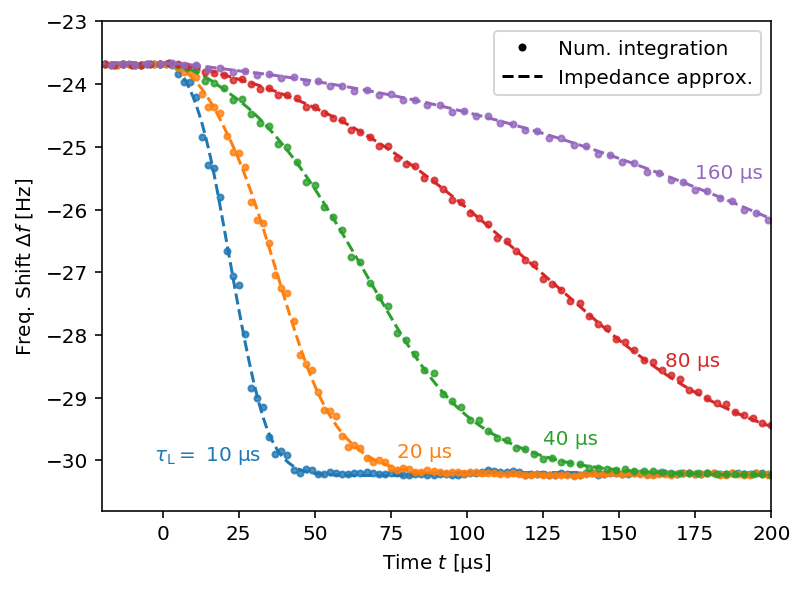

In [4]:
dec = [2, 2, 3, 3, 4]
colors = []
fig = plt.figure(figsize=(6, 4.5))
for ds, dec in zip(varying_taus.values(), dec):
    colors.append(plt.plot(ds['val']['t'][15::dec], ds['val']['df'][::dec]*1e6/(2*np.pi), '.', markersize=6, alpha=0.8)[0].get_color())
    df_python_filt = np.convolve(ds['val']['df_python'], np.ones(16)/16.0, 'valid')
    plt.plot(ds['val']['t'][30:], df_python_filt, '--', color=colors[-1], linewidth=1.5)
plt.plot(-25, -29, '.', color='k', label="Num. integration")
plt.plot(-25, -29, '--', color='k', label="Impedance approx.")
plt.ylim(-30.8, -23)
plt.xlim(-20, 200)
plt.text(-3, -30, "$\\tau_{\\mathrm{L}} = $ 10 µs", color=colors[0])
plt.text(77, -29.95, "20 µs", color=colors[1])
plt.text(125, -29.75, "40 µs", color=colors[2])
plt.text(165, -28.50, "80 µs", color=colors[3])
plt.text(175, -25.5, "160 µs", color=colors[4])
plt.xlabel(u"Time $t$ [µs]")
plt.ylabel(u"Freq. Shift $\\Delta f$ [Hz]")
plt.legend()
plt.savefig('figs/S2.pdf')